In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image
import io

# Load data.npy
data = np.load('data.npy', allow_pickle=True)[()]
# List keys of dataset
data.keys()
# print(data)

im = Image.open('img.tif')
x = np.array(im)

height is  170
shape I =  (170, 256, 31)
xyz shape is:  (3, 31)
M =  [[0.4123908  0.35758434 0.18048079]
 [0.21263901 0.71516868 0.07219232]
 [0.01933082 0.11919478 0.95053215]]


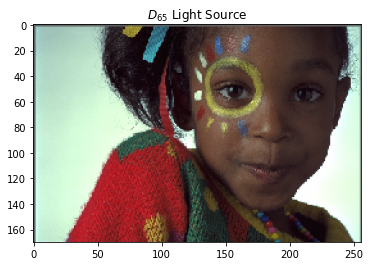

In [2]:
# 1 - Load data.npy and reflect.npy into workspace
Rdata = np.load('reflect.npy', allow_pickle=True)[()]
R = Rdata.get("R")
# print("shape R = ", np.shape(R))
# print(R)
illum1 = data.get("illum1")
# print("shape D65 = ", np.shape(illum1))
# print(illum1)

# 2 - Compute I
n = 31
shape = np.shape(R)
h, w, d = np.shape(R)
print("height is ", h)
I = np.zeros(shape)
print("shape I = ", np.shape(I))
for i in range(n):
    I[:,:,i] = np.dot(illum1[0,i],R[:,:,i])
    
# print(I)
# 3x31 * 31x1 = 3x1
# 

# 3 - Compute XYZ Tristimulus values by applying color matching functions
x = data.get("x")
y = data.get("y")
z = data.get("z")
xyz = np.vstack((x, y, z))
print("xyz shape is: ", np.shape(xyz))
# np.dot(xyz,I[i,j,:]) returns
# test = I[0,0,:]
# test = np.reshape(test, (31,1))
# print(np.shape(test))
d = 3
XYZ = np.zeros((h, w, d))
for i in range(h):
    for j in range(w):
        temp = I[i,j,:]
        tempI = np.reshape(temp, (31,1))
        XYZtemp = np.dot(xyz,tempI) # 3x1
        for k in range(d):
            XYZ[i,j,k] = XYZtemp[k,0]

# 4 - Calculating M
set_709 = np.array([[0.640, 0.330, 0.030],
                    [0.300, 0.600, 0.100],
                    [0.150, 0.060, 0.790]])
D65 = np.array([[0.3127, 0.3290, 0.3583]])
val1 = D65[0,0]/D65[0,1]
val2 = 1
val3 = D65[0,2]/D65[0,1]
wpmat = np.array([[val1],
                  [val2],
                  [val3]])
kcoeffs = np.dot(np.linalg.inv(set_709.T),wpmat)
kcoeffmat = np.array([[kcoeffs[0,0], 0, 0],
                     [0, kcoeffs[1,0], 0],
                     [0, 0, kcoeffs[2,0]]])
M = np.dot(set_709.T,kcoeffmat)
print("M = ", M)

# 5 - Converting to RGB & Clipping
RGB = np.zeros((h, w, d))
for i in range(h):
    for j in range(w):
        temp = XYZ[i,j,:]
        tempXYZ = np.reshape(temp, (3,1))
        RGBtemp = np.dot(np.linalg.inv(M),tempXYZ) # 3x1
        for k in range(d):
            RGB[i,j,k] = RGBtemp[k,0]
            if RGB[i,j,k] > 1:
                RGB[i,j,k] = 1
            elif RGB[i,j,k] < 0:
                RGB[i,j,k] = 0
                    
# 7 - Gamma correcting the image
gamma = 2.2            
RGBcorr = RGB**(1/gamma)

# 8 - Displaying
plt.figure()
plt.title("$D_{65}$ Light Source")
plt.imshow(RGBcorr)

png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("D65Render.tif")
png1.close()

height is  170
shape I =  (170, 256, 31)
xyz shape is:  (3, 31)
M =  [[0.4123908  0.35758434 0.18048079]
 [0.21263901 0.71516868 0.07219232]
 [0.01933082 0.11919478 0.95053215]]


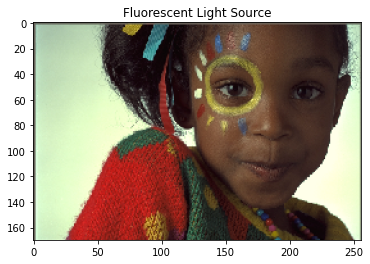

In [3]:
# 1 - Load data.npy and reflect.npy into workspace
Rdata = np.load('reflect.npy', allow_pickle=True)[()]
R = Rdata.get("R")
# print("shape R = ", np.shape(R))
# print(R)
illum2 = data.get("illum2")
# print("shape D65 = ", np.shape(illum1))
# print(illum1)

# 2 - Compute I
n = 31
shape = np.shape(R)
h, w, d = np.shape(R)
print("height is ", h)
I = np.zeros(shape)
print("shape I = ", np.shape(I))
for i in range(n):
    I[:,:,i] = np.dot(illum2[0,i],R[:,:,i])
    
# print(I)
# 3x31 * 31x1 = 3x1
# 

# 3 - Compute XYZ Tristimulus values by applying color matching functions
x = data.get("x")
y = data.get("y")
z = data.get("z")
xyz = np.vstack((x, y, z))
print("xyz shape is: ", np.shape(xyz))
# np.dot(xyz,I[i,j,:]) returns
# test = I[0,0,:]
# test = np.reshape(test, (31,1))
# print(np.shape(test))
d = 3
XYZ = np.zeros((h, w, d))
for i in range(h):
    for j in range(w):
        temp = I[i,j,:]
        tempI = np.reshape(temp, (31,1))
        XYZtemp = np.dot(xyz,tempI) # 3x1
        for k in range(d):
            XYZ[i,j,k] = XYZtemp[k,0]

# 4 - Calculating M
set_709 = np.array([[0.640, 0.330, 0.030],
                    [0.300, 0.600, 0.100],
                    [0.150, 0.060, 0.790]])
D65 = np.array([[0.3127, 0.3290, 0.3583]])
val1 = D65[0,0]/D65[0,1]
val2 = 1
val3 = D65[0,2]/D65[0,1]
wpmat = np.array([[val1],
                  [val2],
                  [val3]])
kcoeffs = np.dot(np.linalg.inv(set_709.T),wpmat)
kcoeffmat = np.array([[kcoeffs[0,0], 0, 0],
                     [0, kcoeffs[1,0], 0],
                     [0, 0, kcoeffs[2,0]]])
M = np.dot(set_709.T,kcoeffmat)
print("M = ", M)

# 5 - Converting to RGB & Clipping
RGB = np.zeros((h, w, d))
for i in range(h):
    for j in range(w):
        temp = XYZ[i,j,:]
        tempXYZ = np.reshape(temp, (3,1))
        RGBtemp = np.dot(np.linalg.inv(M),tempXYZ) # 3x1
        for k in range(d):
            RGB[i,j,k] = RGBtemp[k,0]
            if RGB[i,j,k] > 1:
                RGB[i,j,k] = 1
            elif RGB[i,j,k] < 0:
                RGB[i,j,k] = 0
                    
# 7 - Gamma correcting the image
gamma = 2.2            
RGBcorr = RGB**(1/gamma)

# 8 - Displaying
plt.figure()
plt.title("Fluorescent Light Source")
plt.imshow(RGBcorr)

png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("FluorescentRender.tif")
png1.close()